<a href="https://colab.research.google.com/github/gwangjinjeong/Pytorch/blob/master/basic/00_Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *0. Preparation*

In [4]:
# These are the libraries will be used for this lab.
import torch 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  
torch.__version__

'1.4.0'

<!--  -->

# *1. Numpy Review*
Pytorch에 사용되는 Tensor는 Numpy와 매우 유사하다.
그러므로 Numpy를 간단하게 짚고 넘어간 후에 알아보자

In [49]:
# 1D array
np_1D = np.array([0., 1., 2., 3., 4., 5.,6.])
print(np_1D)
print(f'Rank of t: {np_1D.ndim}')
print(f'Shape of t: {np_1D.shape}')

[0. 1. 2. 3. 4. 5. 6.]
Rank of t: 1
Shape of t: (7,)


In [50]:
# 2D array
np_2D = np.array([[0., 1., 2.], [3.,4.,5.], [6.,7.,8.]])
print(np_2D)
print(f'Rank of t: {np_2D.ndim}')
print(f'Shape of t: {np_2D.shape}')

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
Rank of t: 2
Shape of t: (3, 3)


## *1.1 numpy to tensor*

In [0]:
np_1D = np.array([0., 1., 2., 3., 4., 5.,6.])

In [63]:
# numpy to tensor
new_tensor = torch.from_numpy(np_oneD_np1D)
print(new_tensor)
print(new_tensor.dtype)
print(type(new_tensor))

tensor([0., 1., 2., 3., 4., 5., 6.], dtype=torch.float64)
torch.float64
<class 'torch.Tensor'>


In [64]:
# tensor to numpy
back_to_numpy = new_tensor.numpy()
print(back_to_numpy)
print(back_to_numpy.dtype)
print(type(back_to_numpy))

[0. 1. 2. 3. 4. 5. 6.]
float64
<class 'numpy.ndarray'>


***)** 바꾼 numpy와 tensor는 연결되어있다.

In [65]:
oneD_np += 1
print(new_tensor)
print(back_to_numpy)

tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64)
[1. 2. 3. 4. 5. 6. 7.]


## 1.2 Pandas series to Tensor

In [0]:
pandas_series=pd.Series([0.1, 2, 0.3, 10.1])

In [0]:
new_tensor=torch.from_numpy(pandas_series.values)
print(new_tensor)
print(new_tensor.dtype)
print(new_tensor.type())

tensor([ 0.1000,  2.0000,  0.3000, 10.1000], dtype=torch.float64)
torch.float64
torch.DoubleTensor


In [0]:
this_tensor=torch.tensor([0,1,2,3]) 

**.item** method를 사용하면 해당 Tensor의 값을 반환한다.

In [0]:
print(this_tensor[0].item())
print(type(this_tensor[0].item()))

0
<class 'int'>


**tolist()** method를 사용하면 Tensor를 list로 반환

In [0]:
torch_to_list=this_tensor.tolist()

print('tensor:', this_tensor,"\nlist:",torch_to_list)

tensor: tensor([0, 1, 2, 3]) 
list: [0, 1, 2, 3]


<!--   -->

# *2. Look into Tensor*

2D Tensor   
* 일반적인 상황
* $|t| = (batch\_size, dimension)$

3D Tensor
* 대표적으로 이미지 형태, NLP
* 이미지 : $|t| = (batch\_size,width,height)$
* NLP : $|t| = (batch\_size,length,dimension)$


---
Contents
* Size() : tensor내 element 갯수 same `shape`
* ndimension() : tensor의 차원 [1차원 : (0) // 2차원 : (0,0)]
* view() : `Reshape`
* Squeeze() : dimention이 1인 경우 삭제해준다.
* Unsqueeze() : dimention을 1 늘려준다.
---

## 2.1 Size() and ndimension()

In [98]:
oneD_T = torch.tensor([0, 1, 2, 3, 4]) # 
print(oneD_T)

tensor([0, 1, 2, 3, 4])


In [99]:
oneD_FloatT = torch.FloatTensor([0, 1, 2, 3, 4]) # 
print(oneD_FloatT)

tensor([0., 1., 2., 3., 4.])


In [102]:
print('Before')
print(oneD_T,
      oneD_T.shape,
      oneD_T.size(),
      oneD_T.ndimension(),sep='\n')

Before
tensor([0, 1, 2, 3, 4])
torch.Size([5])
torch.Size([5])
1


In [73]:
print('After')
twoD_T = oneD_T.view(5, 1)
print(twoD_T,
      twoD_T.size(),
      twoD_T.ndimension(), sep='\n')

After
tensor([[0],
        [1],
        [2],
        [3],
        [4]])
torch.Size([5, 1])
2


## 2.2 View

In [74]:
# transposition
oneD_T_transposition = oneD_T.view(-1, 1)
print(oneD_T_transposition)

tensor([[0],
        [1],
        [2],
        [3],
        [4]])


## 2.3 Squeeze and Unsqueeze

Squeeze

In [96]:
tensor_sq = torch.tensor([[1], [2], [3]]) # not a vector
print(tensor_sq.shape)
print(tensor_sq)

torch.Size([3, 1])
tensor([[1],
        [2],
        [3]])


Unsqueeze

In [3]:
tensor_usq = torch.Tensor([0, 1, 2])
print(tensor_usq)
print(tensor_usq.shape)

NameError: ignored

In [0]:
print(tensor_usq.unsqueeze(0)) # print(tensor_usq.view(1, -1))
print(tensor_usq.unsqueeze(0).shape)

In [0]:
print(tensor_usq.unsqueeze(1)) # print(tensor_usq.view(-1, 1))
print(tensor_usq.unsqueeze(1).shape)

In [0]:
print(tensor_usq.unsqueeze(-1))
print(tensor_usq.unsqueeze(-1).shpae)

**practice**   
1. make 3D numpy 
2. change the 3D Float Tensor
3. using `view` chane the shape of 3D Tensor to 2D 
   
$ T=\begin{bmatrix}
0 & 1 & 2 \\
3 & 4 & 5 \\
\end{bmatrix}$
$
, \begin{bmatrix}
6 & 7 & 8 \\
9 & 10 & 11\\
\end{bmatrix}
$
$
=>
\begin{bmatrix}
0 & 1 & 2 \\
3 & 4 & 5 \\
6 & 7 & 8 \\
9 & 10 & 11 \\
\end{bmatrix}
$


Double click this cell if you solve the problem
<!-- Tensor 선언 -->
<!-- 
threeD_np  = np.array([[[0, 1, 2],
                  [3, 4, 5]],
                [[6, 7, 8],
                 [9, 10, 11]]])
print(threeD_np) 
threeD_T = torch.FloatTensor(threeD_np)
print(threeD_T)
-->

In [89]:
threeD_np  = np.array([[[0, 1, 2],
                  [3, 4, 5]],
                [[6, 7, 8],
                 [9, 10, 11]]])
print(threeD_np) 

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


In [88]:
threeD_T = torch.FloatTensor(threeD_np)
print(threeD_T)

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])


In [91]:
print(threeD_T.view(4,3))
print(threeD_T.view(-1,3)) # 앞에는 모르겠고 2D 형태로 열은 3개로 만들래


tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])


# *3. Deal with Tensor*

### 3.1 Indexing and slicing

In [0]:
tensor_sample = torch.tensor([20, 1, 2, 3, 4])

첫번째 sample을 바꾼다고 한다면,

In [7]:
print(tensor_sample)
tensor_sample[0] = 100
print(tensor_sample)

tensor([20,  1,  2,  3,  4])
tensor([100,   1,   2,   3,   4])


일부분만 바꿀 수 도있다.

In [8]:
print(tensor_sample)
tensor_sample[[1, 3]] = 100000
print(tensor_sample)

tensor([100,   1,   2,   3,   4])
tensor([   100, 100000,      2, 100000,      4])


### 3.2 Concatenate

In [0]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [15]:
print(x,y)

tensor([1., 4.]) tensor([2., 5.])


In [10]:
print(torch.cat([x, y], dim=0))
print(torch.cat([x, y], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


### 3.3 Stacking

In [0]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [14]:
print(x,y,z)

tensor([1., 4.]) tensor([2., 5.]) tensor([3., 6.])


In [12]:
print(torch.stack([x, y, z]))
print(torch.stack([x, y, z], dim=1))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [13]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


## 3.4 Ones and Zeros
CPU, GPU0~4 간의 Tensor를 연산하게되면(ex덧셈) 에러가 나게 된다.   
이때 이를 통해서 새로 만들어내는것이 가능하다.

In [16]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [17]:
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


# *4. Tensor Operations*
* Addition(+)
* subtraction(-)
* Multiplication(*)
* Dot Product($\cdot$)

In [0]:
u = torch.tensor([1, 0])
v = torch.tensor([0, 1])

In [20]:
print('u + v = ',u + v)
print('u - v = ',u-v)
print('u + 1 = ',u + 1)
print('2 * u = ',2 * u)
print('u * v = ',u*v)
print('u o v = ',torch.dot(u,v))

u + v =  tensor([1, 1])
u - v =  tensor([ 1, -1])
u + 1 =  tensor([2, 1])
2 * u =  tensor([2, 0])
u * v =  tensor([0, 0])
u o v =  tensor(0)


In [27]:
x = torch.FloatTensor([[1, 2], [3, 4]])
print(x.mul(2.))
print(x)
print(x.mul_(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


#### 4.1 matrix multiplication

In [0]:
A = torch.tensor([[0, 1, 1], [1, 0, 1]])
B = torch.tensor([[1, 1], [1, 1], [-1, 1]])

A_times_B = torch.mm(A,B)
print("The result of A * B\n", A_times_B)

The result of A * B
 tensor([[0, 2],
        [0, 2]])


# *5. Tensor Operations 2*

$$ T=\begin{bmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8
\end{bmatrix}
$$

In [30]:
T = torch.tensor([[0., 1., 2.], [3., 4., 5.], [6., 7., 8.]])
print(T)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])


#### 3.1 Mean

In [32]:
print(T.mean())

tensor(4.)


In [34]:
print(T.mean()) # 4개 elec
print(T.mean(dim=0)) # (3x3) => (1x3) dimention = 0의 평균 즉, 세로의 평균 
print(T.mean(dim=1)) # (3x3) => (3x1) dimention = 1의 평균 즉, 가로의 평균
print(T.mean(dim=-1))# (3x3)에서 가장 마지막 dimention이 1이므로 위와 동일

tensor(4.)
tensor([3., 4., 5.])
tensor([1., 4., 7.])
tensor([1., 4., 7.])


#### 3.2 Sum

In [35]:
print(T.sum())

tensor(36.)


In [37]:
print(T.sum())
print(T.sum(dim=0))
print(T.sum(dim=1))
print(T.sum(dim=-1))

tensor(36.)
tensor([ 9., 12., 15.])
tensor([ 3., 12., 21.])
tensor([ 3., 12., 21.])


#### 3.3 Max and Argmax

In [41]:
print(T)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])


In [38]:
print(T.max())

tensor(8.)


In [46]:
print(T.max(dim=0)) # 즉, (1,0)에 위차한 것이 max값이다. 이때는 Index값을 같이 return해준다.
print('-')
print(T.max(dim=1)) # 즉, (1,0)에 위차한 것이 max값이다.
print('-')
print(T.max(dim=0)[0]) # value값만 return해줘.
print(T.max(dim=0)[1]) # Argmax 값인 즉, Index값만 return해줘.


torch.return_types.max(
values=tensor([6., 7., 8.]),
indices=tensor([2, 2, 2]))
-
torch.return_types.max(
values=tensor([2., 5., 8.]),
indices=tensor([2, 2, 2]))
-
tensor([6., 7., 8.])
tensor([2, 2, 2])


# *6. linspace() and Draw the graph*

In [0]:
def plotVec(vectors):
  ax1 = plt.axes()
  for vec in vectors:
    ax.arrow(0, 0, *vec["vector"], head_width = 0.05,color = vec["color"], head_length = 0.1)
    plt.text(*(vec["vector"] + 0.1), vec["name"])
  plt.ylim(-2,2)
  plt.xlim(-2,2)

steps parameter

In [33]:
# First try on using linspace to create tensor
len_5_tensor = torch.linspace(-2, 2, steps = 5)
len_9_tensor = torch.linspace(-2, 2, steps = 9)
print (len_5_tensor)
print (len_9_tensor)

tensor([-2., -1.,  0.,  1.,  2.])
tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000])


In [0]:
# Construct the tensor within 0 to 360 degree
pi_tensor = torch.linspace(0, 2*np.pi, 100)
sin_result = torch.sin(pi_tensor)

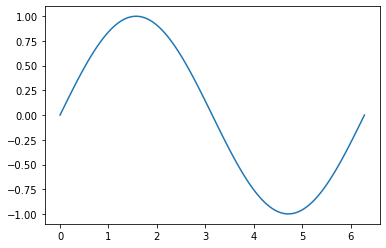

In [35]:
plt.plot(pi_tensor.numpy(), sin_result.numpy())